<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [7]:
# Write your code here
import requests
from bs4 import BeautifulSoup
import csv

def scrape_imdb_user_reviews(film_url, num_pages_to_scrape=800):
    all_user_reviews = []

    for page_num in range(1, num_pages_to_scrape + 1):
        page_url = f"{film_url}?start={((page_num - 1) * 10)}"
        response = requests.get(page_url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            review_elements = soup.find_all("div", class_="text show-more__control")

            for review_element in review_elements:
                review_text = review_element.get_text(strip=True)
                all_user_reviews.append(review_text)
        else:
            print(f"Failed to retrieve IMDb page {page_num}. Check the URL or your internet connection.")

    return all_user_reviews

def save_reviews_to_csv(reviews, csv_filename="imdb_user_reviews.csv"):
    with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["User Review"])

        for review in reviews:
            writer.writerow([review])

    print(f"Collected {len(reviews)} user reviews and saved to '{csv_filename}'.")

# Example usage
film_url = "https://www.imdb.com/title/tt1160419/reviews"
user_reviews = scrape_imdb_user_reviews(film_url)
save_reviews_to_csv(user_reviews)






Collected 19200 user reviews and saved to 'imdb_user_reviews.csv'.


In [8]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.util import ngrams
from collections import Counter

# Download NLTK data
nltk.download('all')

def read_imdb_reviews(csv_filename='imdb_user_reviews.csv'):
    return pd.read_csv(csv_filename)

def tokenize_text(text):
    return word_tokenize(text)

def get_pos_tags(tokens):
    return pos_tag(tokens)

def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

def count_ngrams(ngram_list):
    return Counter(ngram_list)

# Example usage
imdb_reviews = read_imdb_reviews()
reviews_text = imdb_reviews['User Review']

# Tokenize and get POS tags for the first review
tokens = tokenize_text(reviews_text[0])
pos_tags = get_pos_tags(tokens)

# Generate and count bigrams for the first review
bigrams = generate_ngrams(tokens, 2)
bigram_counts = count_ngrams(bigrams)

print("Tokens:", tokens)
print("POS Tags:", pos_tags)
print("Bigram Counts:", bigram_counts)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Tokens: ['Denis', 'Villeneuve', 'has', 'accomplished', 'what', 'was', 'considered', 'impossible', 'for', 'decades', ',', 'to', 'write', 'and', 'direct', 'a', 'faithful', 'adaptation', 'to', 'the', 'fantastic', '1965', 'sci-fi', 'novel', 'by', 'Frank', 'Herbert', '.', 'And', 'I', "'m", 'here', 'to', 'tell', 'you', ',', 'he', 'has', 'done', 'it', ',', 'he', 'has', 'actually', 'done', 'it.I', 'was', 'introduced', 'to', 'the', 'world', 'of', 'dune', 'in', '1992', 'by', 'playing', 'the', 'video', 'game', 'DUNE', 'released', 'that', 'year', '.', 'The', 'story', 'completely', 'captivated', 'me', ',', 'so', 'i', 'decided', 'to', 'read', 'the', 'book', '.', 'And', 'to', 'this', 'day', ',', 'it', "'s", 'one', 'of', 'the', 'best', 'stories', 'I', "'ve", 'ever', 'read', '.', 'A', 'tale', 'absolutely', 'grand', 'in', 'scale', ',', 'and', 'filled', 'with', 'details', ',', 'making', 'it', 'really', 'hard', 'to', 'adapt', 'for', 'the', 'big', 'screen', ',', 'even', 'today', 'with', 'all', 'the', 'tech

In [9]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initializing NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and preprocess the given text.

    Parameters:
    - text (str): The input text to be cleaned.

    Returns:
    - str: The cleaned text.
    """
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing special characters and punctuation, keep only alphabetic words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Tokenizing text
    tokens = word_tokenize(text)
    # Removing stop words and single-character tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1]
    # Joining tokens back into a sentence
    clean_text = ' '.join(tokens)
    return clean_text

def apply_cleaning_to_column(df, column_name):
    """
    Apply the clean_text function to a specific column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the column to be cleaned.

    Returns:
    - pd.DataFrame: The DataFrame with the cleaned column.
    """
    df['clean_text'] = df[column_name].apply(clean_text)
    return df

def select_first_n_rows(df, n=100):
    """
    Select the first n rows from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - n (int): The number of rows to select.

    Returns:
    - pd.DataFrame: The DataFrame with the first n rows.
    """
    return df.head(n)

# Example usage
imdb = pd.read_csv('imdb_user_reviews.csv')

# Clean the 'User Review' column
imdb_cleaned = apply_cleaning_to_column(imdb, 'User Review')

# Select the first 100 cleaned tweets
tweets_100 = select_first_n_rows(imdb_cleaned, n=100)

# Display the result
print(tweets_100[['User Review', 'clean_text']])


                                          User Review  \
0   Denis Villeneuve has accomplished what was con...   
1   It's been amazing being back in cinemas after ...   
2   It's been some time since I've read the Frank ...   
3   Greetings from Lithuania."Dune. Part I" (2021)...   
4   Having read the book a hundred years ago, it t...   
..                                                ...   
95  What can I say. Not only did I watch this movi...   
96  Denis Villeneuve has accomplished what was con...   
97  It's been amazing being back in cinemas after ...   
98  It's been some time since I've read the Frank ...   
99  Greetings from Lithuania."Dune. Part I" (2021)...   

                                           clean_text  
0   denis villeneuve accomplished considered impos...  
1   amazing back cinema last year seen good film s...  
2   time since ive read frank herbert novel alread...  
3   greeting lithuaniadune part amazing cinematic ...  
4   read book hundred year ago took

In [10]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initializing NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and preprocess the given text.

    Parameters:
    - text (str): The input text to be cleaned.

    Returns:
    - str: The cleaned text.
    """
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing special characters and punctuation, keep only alphabetic words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Tokenizing text
    tokens = word_tokenize(text)
    # Removing stop words and single-character tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1]
    # Joining tokens back into a sentence
    clean_text = ' '.join(tokens)
    return clean_text

def apply_cleaning_to_column(df, column_name):
    """
    Apply the clean_text function to a specific column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the column to be cleaned.

    Returns:
    - pd.DataFrame: The DataFrame with the cleaned column.
    """
    df['clean_text'] = df[column_name].apply(clean_text)
    return df

def select_subset(df, column_name, n=100):
    """
    Select a subset of rows from a specific column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the column from which to select the subset.
    - n (int): The number of rows to select.

    Returns:
    - pd.Series: The subset of rows from the specified column.
    """
    subset = df[column_name][:n]
    return subset

# Example usage
imdb = pd.read_csv('imdb_user_reviews.csv')

# Clean the 'User Review' column
imdb_cleaned = apply_cleaning_to_column(imdb, 'User Review')

# Select the first 100 cleaned reviews
subset_reviews = select_subset(imdb_cleaned, 'clean_text', n=100)

# Display the result
print(subset_reviews)


0     denis villeneuve accomplished considered impos...
1     amazing back cinema last year seen good film s...
2     time since ive read frank herbert novel alread...
3     greeting lithuaniadune part amazing cinematic ...
4     read book hundred year ago took time begin und...
                            ...                        
95    say watch movie body astrally projected arraki...
96    denis villeneuve accomplished considered impos...
97    amazing back cinema last year seen good film s...
98    time since ive read frank herbert novel alread...
99    greeting lithuaniadune part amazing cinematic ...
Name: clean_text, Length: 100, dtype: object


In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter

def extract_and_count_ngrams(texts, n):
    ngram_freq = Counter()
    for text in texts:
        tokens = nltk.word_tokenize(text)
        n_grams = ngrams(tokens, n)
        ngram_freq.update([' '.join(gram) for gram in n_grams])
    return ngram_freq

# Example usage
n = 3
subset_reviews = tweets_100['clean_text'][:100]  # Replace with your actual subset of reviews

# Count the frequency of N-grams
ngram_frequency = extract_and_count_ngrams(subset_reviews, n)

# Display the top 20 most frequent N-grams
print(f"Frequency of all the {n}-grams:")
print(ngram_frequency.most_common(20))


Frequency of all the 3-grams:
[('two half hour', 23), ('havent read book', 22), ('half first novel', 15), ('dune part one', 12), ('denis villeneuve accomplished', 10), ('something great never', 10), ('great never happens', 10), ('grand scale everything', 10), ('movie going experience', 10), ('read frank herbert', 9), ('paul atreides timothe', 9), ('atreides timothe chalamet', 9), ('director denis villeneuve', 9), ('read book seen', 9), ('frank herbert classic', 8), ('desert planet arrakis', 8), ('never read book', 8), ('frank herbert dune', 8), ('score han zimmer', 8), ('read book dont', 8)]


In [11]:
import nltk
from nltk.util import ngrams
from collections import Counter

def calculate_bigram_probabilities(texts):
    bigram_freq = Counter()
    unigram_freq = Counter()

    for text in texts:
        tokens = nltk.word_tokenize(text)
        unigram_freq.update(tokens)
        bigram_freq.update(ngrams(tokens, 2))

    bigram_probabilities = {}
    for bigram, freq in bigram_freq.items():
        word1, word2 = bigram
        bigram_probabilities[bigram] = freq / unigram_freq[word1]

    return bigram_probabilities

# Example usage
subset_reviews = tweets_100['clean_text'][:100] # Replace with your actual subset of reviews

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(subset_reviews)

# Display the probabilities of the first 10 bigrams
print("(2) Probabilities for all the bigrams:")
for bigram, probability in list(bigram_probabilities.items())[:10]:
    print(f"{bigram}: {probability:.2f}")


(2) Probabilities for all the bigrams:
('denis', 'villeneuve'): 0.71
('villeneuve', 'accomplished'): 0.09
('accomplished', 'considered'): 0.50
('considered', 'impossible'): 1.00
('impossible', 'decade'): 0.38
('decade', 'write'): 0.50
('write', 'direct'): 0.56
('direct', 'faithful'): 1.00
('faithful', 'adaptation'): 0.56
('adaptation', 'fantastic'): 0.12


In [12]:
import nltk
from nltk import pos_tag
from nltk.chunk import RegexpParser
from collections import Counter
import pandas as pd

def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens)
    grammar = r"NP: {<DT>?<JJ>*<NN>}"
    cp = RegexpParser(grammar)
    tree = cp.parse(tagged)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))
    return noun_phrases

def calculate_relative_probabilities(texts):
    noun_phrase_freq = Counter()

    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        noun_phrase_freq.update(noun_phrases)

    max_freq = max(noun_phrase_freq.values())
    relative_probabilities = {
        index + 1: {noun_phrase: freq / max_freq for noun_phrase, freq in noun_phrase_freq.items()}
        for index, _ in enumerate(texts)
    }

    return relative_probabilities

# Example usage
subset_reviews = tweets_100['clean_text'][:100]  # Replace with your actual subset of reviews

# Calculate relative probabilities of noun phrases
relative_probabilities = calculate_relative_probabilities(subset_reviews)

# Display the relative probabilities in a table
print("(3) Relative probabilities of noun phrases for each review:")
df_relative_probabilities = pd.DataFrame(relative_probabilities).T.fillna(0)
print(df_relative_probabilities)
df_relative_probabilities.head()


(3) Relative probabilities of noun phrases for each review:
        denis  villeneuve  impossible decade     write  \
1    0.278689    0.464481           0.027322  0.027322   
2    0.278689    0.464481           0.027322  0.027322   
3    0.278689    0.464481           0.027322  0.027322   
4    0.278689    0.464481           0.027322  0.027322   
5    0.278689    0.464481           0.027322  0.027322   
..        ...         ...                ...       ...   
96   0.278689    0.464481           0.027322  0.027322   
97   0.278689    0.464481           0.027322  0.027322   
98   0.278689    0.464481           0.027322  0.027322   
99   0.278689    0.464481           0.027322  0.027322   
100  0.278689    0.464481           0.027322  0.027322   

     direct faithful adaptation  fantastic scifi     novel  herbert im  \
1                      0.027322         0.027322  0.218579    0.027322   
2                      0.027322         0.027322  0.218579    0.027322   
3                    

,denis,villeneuve,impossible decade,write,direct faithful adaptation,fantastic scifi,novel,herbert im,iti,world,...,terrible taste,white savior read,watchingmidway,future,danger,charismatic leadership,godhood,thrown,face,scifi
1,0.278689,0.464481,0.027322,0.027322,0.027322,0.027322,0.218579,0.027322,0.027322,0.114754,...,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858
2,0.278689,0.464481,0.027322,0.027322,0.027322,0.027322,0.218579,0.027322,0.027322,0.114754,...,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858
3,0.278689,0.464481,0.027322,0.027322,0.027322,0.027322,0.218579,0.027322,0.027322,0.114754,...,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858
4,0.278689,0.464481,0.027322,0.027322,0.027322,0.027322,0.218579,0.027322,0.027322,0.114754,...,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858
5,0.278689,0.464481,0.027322,0.027322,0.027322,0.027322,0.218579,0.027322,0.027322,0.114754,...,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858,0.021858


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [13]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def create_tfidf_matrix(texts):
    """
    Create a TF-IDF matrix from a list of texts.

    Parameters:
    - texts (list): A list of texts.

    Returns:
    - scipy.sparse.csr_matrix: The TF-IDF matrix.
    - sklearn.feature_extraction.text.TfidfVectorizer: The vectorizer used for the transformation.
    """
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix, vectorizer

# Example usage
subset_reviews = tweets_100['clean_text'][:100] # Replace with your actual subset of reviews

# Create TF-IDF matrix
tfidf_matrix, vectorizer = create_tfidf_matrix(subset_reviews)

# Display the TF-IDF matrix
df_tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("TF-IDF Matrix:")
print(df_tfidf_matrix)








TF-IDF Matrix:
       able  abruptlyalso  absolutely  absolutley  accompanied  accomplished  \
0   0.05274           0.0    0.075171         0.0          0.0       0.10548   
1   0.00000           0.0    0.000000         0.0          0.0       0.00000   
2   0.00000           0.0    0.000000         0.0          0.0       0.00000   
3   0.00000           0.0    0.000000         0.0          0.0       0.00000   
4   0.00000           0.0    0.000000         0.0          0.0       0.00000   
..      ...           ...         ...         ...          ...           ...   
95  0.00000           0.0    0.000000         0.0          0.0       0.00000   
96  0.05274           0.0    0.075171         0.0          0.0       0.10548   
97  0.00000           0.0    0.000000         0.0          0.0       0.00000   
98  0.00000           0.0    0.000000         0.0          0.0       0.00000   
99  0.00000           0.0    0.000000         0.0          0.0       0.00000   

    accomplishedok  achi

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define the function to create the TF-IDF matrix
def create_tfidf_matrix(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix, vectorizer

# Define the function to calculate cosine similarity
def calculate_cosine_similarity(query_vector, document_matrix):
    return cosine_similarity(query_vector, document_matrix)

# Define the function to rank documents based on cosine similarity
def rank_documents(cosine_similarities):
    ranked_documents = [(similarity, idx) for idx, similarity in enumerate(cosine_similarities[0])]
    return sorted(ranked_documents, key=lambda x: x[0], reverse=True)

# Define the function to display ranked documents
def display_ranked_documents(ranked_documents, imdb_reviews):
    print("Ranking of documents based on the query:")
    for similarity, idx in ranked_documents:
        print(f"Document {idx + 1}: Similarity = {similarity:.4f}")
        print(f"Review: {imdb_reviews[idx]}")
        print("-" * 50)

# Read the IMDb reviews dataset (replace 'imdb_user_reviews.csv' with your actual file)
imdb = pd.read_csv('imdb_user_reviews.csv')

# Extract a subset of reviews
subset_reviews = tweets_100['clean_text'][:100]

# Create TF-IDF matrix
tfidf_matrix, vectorizer = create_tfidf_matrix(subset_reviews)

# Example usage
query = "An Outstanding movie with a haunting performance and best character development"
query_tfidf_vector = vectorizer.transform([query])

# Calculate cosine similarity
cos_similarities = calculate_cosine_similarity(query_tfidf_vector, tfidf_matrix)

# Rank and display documents
ranked_documents = rank_documents(cos_similarities)
display_ranked_documents(ranked_documents, imdb['User Review'])


Ranking of documents based on the query:
Document 1: Similarity = 0.1219
Review: Denis Villeneuve has accomplished what was considered impossible for decades, to write and direct a faithful adaptation to the fantastic 1965 sci-fi novel by Frank Herbert. And I'm here to tell you, he has done it, he has actually done it.I was introduced to the world of dune in 1992 by playing the video game DUNE released that year. The story completely captivated me, so i decided to read the book. And to this day, it's one of the best stories I've ever read. A tale absolutely grand in scale, and filled with details, making it really hard to adapt for the big screen, even today with all the technology we have at our disposal.I saw the film made by David Lynch, a few years after i read the book, and about 10 years after it was released, and i didn't enjoy it much. The 1984 film completely fails at capturing the very essence of the novel, and feels shallow and unfocused.One of the main differences with this

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [18]:
pip install gensim

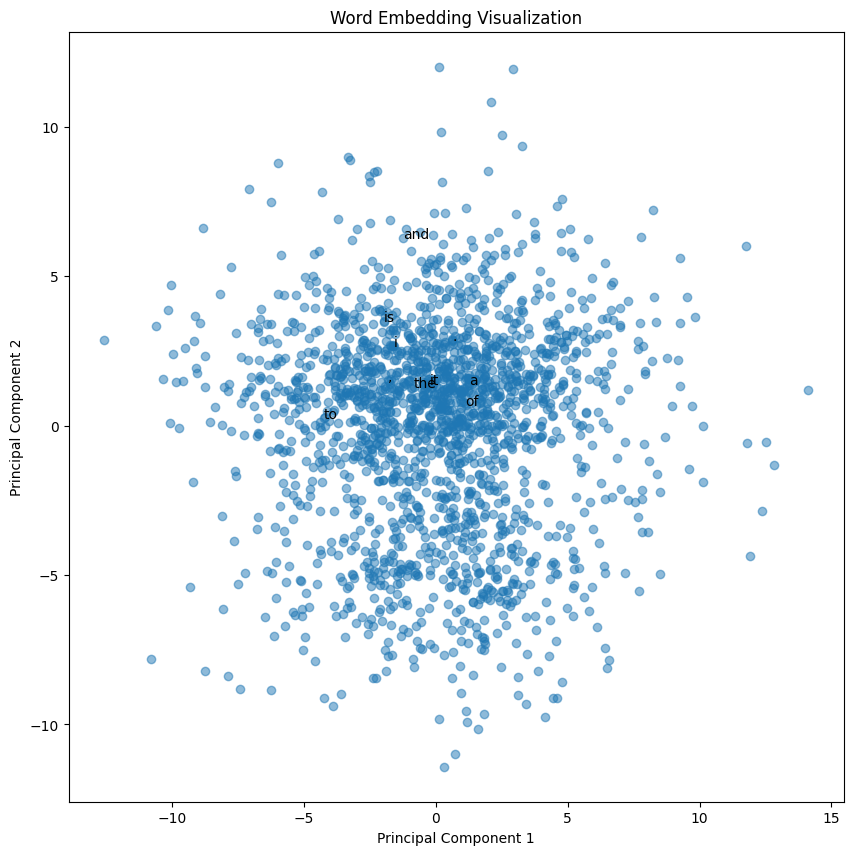

In [19]:
# Write your code here

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def train_word2vec_model(texts, vector_size=300, window=5, min_count=1, workers=4):
    """
    Train a Word2Vec model on a list of tokenized texts.

    Parameters:
    - texts (list): A list of tokenized texts.
    - vector_size (int): Dimensionality of the word vectors.
    - window (int): Maximum distance between the current and predicted word within a sentence.
    - min_count (int): Ignores all words with a total frequency lower than this.
    - workers (int): Number of CPU cores to use when training the model.

    Returns:
    - gensim.models.Word2Vec: Trained Word2Vec model.
    """
    model = Word2Vec(sentences=texts, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

def visualize_word_embeddings(model, num_words_to_annotate=10):
    """
    Visualize word embeddings using PCA.

    Parameters:
    - model (gensim.models.Word2Vec): Trained Word2Vec model.
    - num_words_to_annotate (int): Number of words to annotate on the plot.

    Returns:
    - None
    """
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]

    pca = PCA(n_components=2)
    vectors_pca = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.5)

    # Annotate some words on the plot
    for i, word in enumerate(words[:num_words_to_annotate]):
        plt.annotate(word, xy=(vectors_pca[i, 0], vectors_pca[i, 1]))

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Embedding Visualization')
    plt.show()

# Example usage
documents = imdb['User Review'].tolist()
tokenized_data = [word_tokenize(review.lower()) for review in documents]

# Train Word2Vec model
word2vec_model = train_word2vec_model(tokenized_data)

# Visualize word embeddings
visualize_word_embeddings(word2vec_model)






# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


https://github.com/sowmya536/5731/blob/main/imdb_annotated_reviews.csv

the link for the dataset.